In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Explore Data

In [2]:
df = pd.read_csv("./train.csv")

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Nulls 

In [3]:
nulls_abs = df.isna().sum()            
nulls_pct = df.isna().mean() * 100   

nulls_resume = (
    pd.DataFrame({
        "Nulls": nulls_abs,
        "Percentage": nulls_pct.round(2)
    })
    .sort_values("Nulls", ascending=False)
)

nulls_resume

,Nulls,Percentage
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00


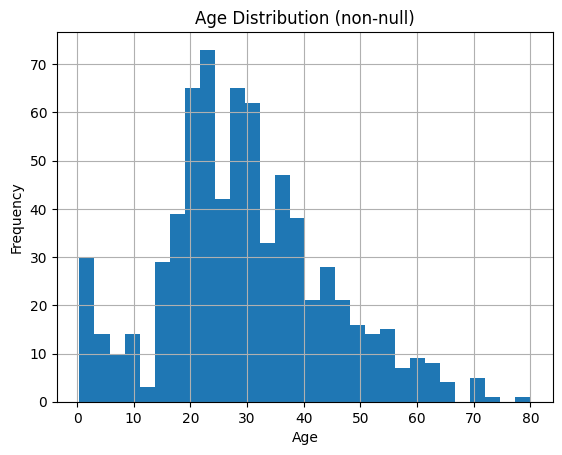

In [4]:
# Histogram of existing Age values
import matplotlib.pyplot as plt

df["Age"].dropna().hist(bins=30)
plt.title("Age Distribution (non-null)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


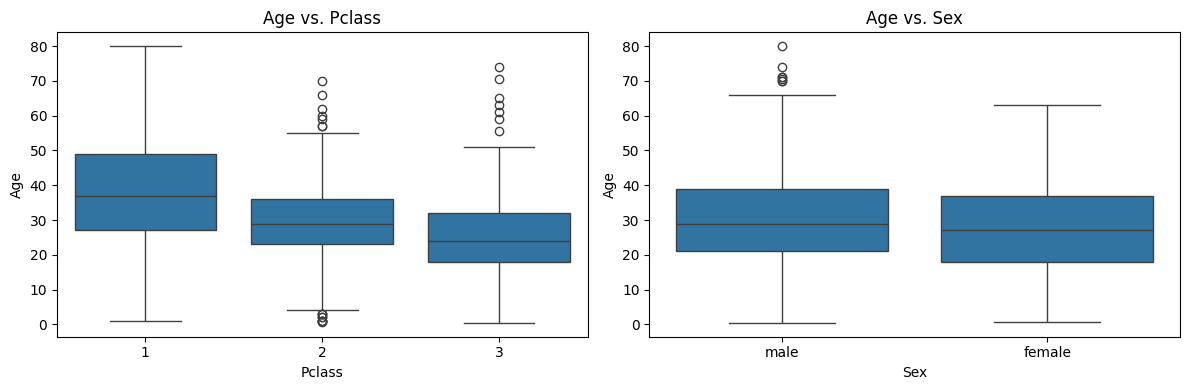

In [5]:
# Boxplot Age by Pclass and by Sex
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(x="Pclass", y="Age", data=df, ax=ax[0])
ax[0].set_title("Age vs. Pclass")
sns.boxplot(x="Sex", y="Age", data=df, ax=ax[1])
ax[1].set_title("Age vs. Sex")
plt.tight_layout()
plt.show()

In [6]:
"""from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

df_notnull = df.dropna(subset=["Age"])

X = df_notnull[["Fare", "SibSp", "Parch", "Pclass"]]
y = df_notnull["Age"]

scores = []
for n in range(10, 501, 10):          
    rf = RandomForestRegressor(
        n_estimators=n,
        random_state=0,             
        n_jobs=-1,
    )
    cv_score = cross_val_score(
        rf, X, y,
        cv=5,
        scoring="neg_mean_absolute_error",
        error_score="raise"           
    )
    scores.append(cv_score.mean())

cv_results = pd.DataFrame({
    "n_estimators": range(10, 501, 10),
    "cv_mae": np.abs(scores)        
})

print(cv_results.sort_values(by="cv_mae").head())"""

'from sklearn.model_selection import cross_val_score\nfrom sklearn.ensemble import RandomForestRegressor\nimport pandas as pd\nimport numpy as np\n\ndf_notnull = df.dropna(subset=["Age"])\n\nX = df_notnull[["Fare", "SibSp", "Parch", "Pclass"]]\ny = df_notnull["Age"]\n\nscores = []\nfor n in range(10, 501, 10):          \n    rf = RandomForestRegressor(\n        n_estimators=n,\n        random_state=0,             \n        n_jobs=-1,\n    )\n    cv_score = cross_val_score(\n        rf, X, y,\n        cv=5,\n        scoring="neg_mean_absolute_error",\n        error_score="raise"           \n    )\n    scores.append(cv_score.mean())\n\ncv_results = pd.DataFrame({\n    "n_estimators": range(10, 501, 10),\n    "cv_mae": np.abs(scores)        \n})\n\nprint(cv_results.sort_values(by="cv_mae").head())'

In [7]:
from sklearn.ensemble import RandomForestRegressor

df["Age_imputed"] = df["Age"]

missing_age_mask = df["Age_imputed"].isna()

X_train = df.loc[~missing_age_mask, ["Fare", "SibSp", "Parch", "Pclass"]]
y_train = df.loc[~missing_age_mask, "Age_imputed"]

rf = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

df.loc[missing_age_mask, "Age_imputed"] = rf.predict(
    df.loc[missing_age_mask, ["Fare", "SibSp", "Parch", "Pclass"]]
)

print(df["Age_imputed"].isna().sum())

0


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestRegressor

class AgeImputer(BaseEstimator, TransformerMixin):
    """Imputes missing Age values using Random Forest."""
    
    def __init__(self, features_for_imputation=None, random_state=0):
        self.features_for_imputation = features_for_imputation or ["Fare", "SibSp", "Parch", "Pclass"]
        self.random_state = random_state
        self.model = None
        
    def fit(self, X, y=None):
        X_copy = X.copy()
        X_copy["Age_imputed"] = X_copy["Age"]
        missing_age_mask = X_copy["Age_imputed"].isna()
        
        if missing_age_mask.sum() > 0:
            X_train = X_copy.loc[~missing_age_mask, self.features_for_imputation]
            y_train = X_copy.loc[~missing_age_mask, "Age_imputed"]
            
            self.model = RandomForestRegressor(
                random_state=self.random_state, 
                n_estimators=100, 
                n_jobs=-1
            )
            self.model.fit(X_train, y_train)
        
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy["Age_imputed"] = X_copy["Age"]
        missing_age_mask = X_copy["Age_imputed"].isna()
        
        if missing_age_mask.sum() > 0 and self.model is not None:
            X_copy.loc[missing_age_mask, "Age_imputed"] = self.model.predict(
                X_copy.loc[missing_age_mask, self.features_for_imputation]
            )
        
        return X_copy

class FeatureEngineer(BaseEstimator, TransformerMixin):
    """Creates new features from existing ones."""
    
    def __init__(self):
        self.rare_titles = ["Lady", "Countess", "Capt", "Col", "Don", "Dr", "Major", "Rev",
                           "Sir", "Jonkheer", "Dona"]
        self.title_mapping = {"Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs"}
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        
        # Extract title from name
        X_copy["Title"] = X_copy["Name"].str.extract(r",\s*([^\.]+)\.", expand=False)
        X_copy["Title"] = X_copy["Title"].replace(self.rare_titles, "Rare")
        X_copy["Title"] = X_copy["Title"].replace(self.title_mapping)
        
        # Family size
        X_copy["FamilySize"] = X_copy["SibSp"] + X_copy["Parch"] + 1
        X_copy["IsAlone"] = (X_copy["FamilySize"] == 1).astype(int)
        
        # Ship deck
        X_copy["Deck"] = X_copy["Cabin"].str[0].fillna("M")
        
        # Bands for Fare and Age
        if "Fare" in X_copy.columns:
            X_copy["FareBand"] = pd.qcut(X_copy["Fare"], 4, labels=False)
        
        if "Age_imputed" in X_copy.columns:
            X_copy["AgeBand"] = pd.cut(
                X_copy["Age_imputed"], 
                bins=[0, 12, 18, 35, 60, 80],
                labels=False, 
                include_lowest=True
            )
        
        # Ticket prefix
        X_copy["TicketPrefix"] = X_copy["Ticket"].str.extract(
            r"^([A-Za-z\.\/]+)", expand=False
        ).fillna("NONE")
        
        # Missing cabin indicator
        X_copy["CabinMissing"] = X_copy["Cabin"].isna().astype(int)
        
        return X_copy

class OutlierDetector(BaseEstimator, TransformerMixin):
    """Detects outliers using IQR and robust Z-score methods."""
    
    def __init__(self, iqr_factor=1.5, zscore_threshold=3.5):
        self.iqr_factor = iqr_factor
        self.zscore_threshold = zscore_threshold
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        
        if "Age_imputed" in X_copy.columns:
            q1, q3 = np.percentile(X_copy["Age_imputed"], [25, 75])
            iqr = q3 - q1
            lower, upper = q1 - self.iqr_factor * iqr, q3 + self.iqr_factor * iqr
            outliers_iqr = ~X_copy["Age_imputed"].between(lower, upper)
            
            median = np.median(X_copy["Age_imputed"])
            mad = np.median(np.abs(X_copy["Age_imputed"] - median))
            z = 0.6745 * (X_copy["Age_imputed"] - median) / (mad if mad else 1)
            outliers_z = np.abs(z) > self.zscore_threshold
            
            X_copy["is_outlier_uni"] = (outliers_iqr | outliers_z).astype(int)
        
        return X_copy

class ColumnSelector(BaseEstimator, TransformerMixin):
    """Selects specific columns from the DataFrame."""
    
    def __init__(self, columns_to_drop=None, columns_to_keep=None):
        self.columns_to_drop = columns_to_drop or []
        self.columns_to_keep = columns_to_keep
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        
        if self.columns_to_keep:
            return X_copy[self.columns_to_keep]
        else:
            return X_copy.drop(columns=self.columns_to_drop, errors='ignore')

def create_titanic_pipeline(model, categorical_features=None, numerical_features=None):
    """Creates a complete pipeline for the Titanic dataset."""
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import OneHotEncoder, StandardScaler
    from sklearn.pipeline import Pipeline
    
    if categorical_features is None:
        categorical_features = [
            "Sex", "Embarked", "Pclass", "Title", "Deck", "FareBand", 
            "AgeBand", "TicketPrefix", "CabinMissing", "IsAlone", "is_outlier_uni"
        ]
    
    if numerical_features is None:
        numerical_features = ["Age_imputed", "Fare", "FamilySize", "SibSp", "Parch"]
    
    preprocessing = Pipeline([
        ("age_imputer", AgeImputer()),
        ("feature_engineer", FeatureEngineer()),
        ("outlier_detector", OutlierDetector()),
        ("column_selector", ColumnSelector(
            columns_to_drop=["PassengerId", "Name", "Age", "Ticket", "Cabin"]
        ))
    ])
    
    preprocessor = ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", StandardScaler(), numerical_features)
    ])
    
    full_pipeline = Pipeline([
        ("preprocessing", preprocessing),
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    
    return full_pipeline

print("Modular functions created successfully!")

Funciones modulares creadas exitosamente!


## Outliers

In [9]:
def iqr_outliers(s, factor: float = 1.5):
    """Return True if the value is an outlier by the IQR method."""
    q1, q3 = np.percentile(s, [25, 75])
    iqr = q3 - q1
    lower, upper = q1 - factor * iqr, q3 + factor * iqr
    return ~s.between(lower, upper)

def zscore_outliers(s, threshold: float = 3.5):
    """Detect outliers using a robust z-score (median and MAD)."""
    median = np.median(s)
    mad = np.median(np.abs(s - median))
    z = 0.6745 * (s - median) / (mad if mad else 1)
    return np.abs(z) > threshold

outliers_iqr = iqr_outliers(df["Age_imputed"])
outliers_z   = zscore_outliers(df["Age_imputed"])

df["is_outlier_uni"] = (outliers_iqr | outliers_z)

df['is_outlier_uni'].value_counts()

is_outlier_uni
False    863
True      28
Name: count, dtype: int64

In [10]:
df[df['is_outlier_uni'] == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_imputed,is_outlier_uni
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S,66.0,True
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,65.0,True
94,95,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,NaN,S,59.0,True
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,71.0,True
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,70.5,True
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S,61.0,True
232,233,0,2,"Sjostedt, Mr. Ernst Adolf",male,59.0,0,0,237442,13.5000,NaN,S,59.0,True
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S,62.0,True
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,63.0,True
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q,65.0,True


# Feature Engineering

In [11]:
import pandas as pd
import numpy as np

df["Title"] = df["Name"].str.extract(r",\s*([^\.]+)\.", expand=False)
rare_titles = ["Lady", "Countess", "Capt", "Col", "Don", "Dr", "Major", "Rev",
               "Sir", "Jonkheer", "Dona"]
df["Title"] = df["Title"].replace(rare_titles, "Rare")
df["Title"] = df["Title"].replace({"Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs"})

df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["IsAlone"] = (df["FamilySize"] == 1).astype(int)

df["Deck"] = df["Cabin"].str[0].fillna("M")  # M = Missing

df["FareBand"] = pd.qcut(df["Fare"], 4, labels=False)
df["AgeBand"] = pd.cut(df["Age_imputed"], bins=[0, 12, 18, 35, 60, 80],
                       labels=False, include_lowest=True)

df["TicketPrefix"] = df["Ticket"].str.extract(r"^([A-Za-z\.\/]+)", expand=False).fillna("NONE")
df["CabinMissing"] = df["Cabin"].isna().astype(int)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_imputed,is_outlier_uni,Title,FamilySize,IsAlone,Deck,FareBand,AgeBand,TicketPrefix,CabinMissing
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,22.0,False,Mr,2,0,M,0,2,A/,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,38.0,False,Mrs,2,0,C,3,3,PC,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,26.0,False,Miss,1,1,M,1,2,STON/O,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,35.0,False,Mrs,2,0,C,3,2,NONE,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,35.0,False,Mr,1,1,M,1,2,NONE,1


# Model

## Logit

In [ ]:
# Logistic Regression with modular pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Create modular pipeline for Logistic Regression
logreg_pipeline = create_titanic_pipeline(LogisticRegression(max_iter=1000, random_state=0))

# Evaluate with cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
score = cross_val_score(logreg_pipeline, df, df["Survived"], cv=cv, scoring="accuracy").mean()
print(f"Logistic Regression CV Score: {score:.4f}")

# Train the complete pipeline
logreg_pipeline.fit(df, df["Survived"])

Logistic Regression CV Score: 0.8103
Pipeline entrenado exitosamente!


In [ ]:
# Grid Search with modular pipeline (Logistic Regression)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Create modular pipeline for Grid Search
logreg_pipeline_gs = create_titanic_pipeline(LogisticRegression(random_state=0))

# Define parameters for Grid Search with modular pipeline
param_grid = [
    {
        "classifier__solver": ["liblinear"],
        "classifier__penalty": ["l1", "l2"],
        "classifier__C": [0.001, 0.01, 0.1, 1, 10],
        "classifier__class_weight": [None, "balanced"],
    },
    {
        "classifier__solver": ["saga"],
        "classifier__penalty": ["l1", "l2", "elasticnet"],
        "classifier__C": [0.001, 0.01, 0.1, 1, 10],
        "classifier__l1_ratio": [0.0, 0.25, 0.5, 0.75],  
        "classifier__class_weight": [None, "balanced"],
        "classifier__max_iter": [2000],                   
    },
]

# Grid Search with modular pipeline
search = GridSearchCV(
    estimator=logreg_pipeline_gs,
    param_grid=param_grid,
    cv=StratifiedKFold(5, shuffle=True, random_state=0),
    scoring="accuracy",
    n_jobs=-1,
    error_score="raise",
)

search.fit(df, df["Survived"])
print(f"Best parameters: {search.best_params_}")
print(f"Best score: {search.best_score_:.4f}")

Mejores parámetros: {'classifier__C': 0.1, 'classifier__class_weight': None, 'classifier__l1_ratio': 0.25, 'classifier__max_iter': 2000, 'classifier__penalty': 'elasticnet', 'classifier__solver': 'saga'}
Mejor score: 0.8238


## XGBoost

In [ ]:
# XGBoost with modular pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Create modular pipeline for XGBoost
xgb_pipeline = create_titanic_pipeline(
    XGBClassifier(
        random_state=0,
        n_estimators=400,
        learning_rate=0.05,
        max_depth=3,
        subsample=0.9,
        colsample_bytree=0.8,
        objective="binary:logistic",
        eval_metric="logloss",
        use_label_encoder=False
    )
)

# Evaluate with cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
score_xgb = cross_val_score(xgb_pipeline, df, df["Survived"], cv=cv, scoring="accuracy").mean()
print(f"XGBoost CV Score: {score_xgb:.4f}")


XGBoost CV Score: 0.8339


## Random Forest

In [ ]:
# Random Forest with modular pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Create modular pipeline for Random Forest
rf_pipeline = create_titanic_pipeline(RandomForestClassifier(random_state=0, n_estimators=500))

# Evaluate with cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
score_rf = cross_val_score(rf_pipeline, df, df["Survived"], cv=cv, scoring="accuracy").mean()
print(f"Random Forest CV Score: {score_rf:.4f}")

Random Forest CV Score: 0.8215


## SVM lineal

In [ ]:
# SVM with modular pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Create modular pipeline for SVM
svm_pipeline = create_titanic_pipeline(LinearSVC(random_state=0, C=1, max_iter=2000))

# Evaluate with cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
score_svm = cross_val_score(svm_pipeline, df, df["Survived"], cv=cv, scoring="accuracy").mean()
print(f"SVM CV Score: {score_svm:.4f}")


c:\Users\carlo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\carlo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\carlo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\carlo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\

SVM CV Score: 0.8137


c:\Users\carlo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\carlo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Final Model

In [ ]:
# Final model with modular pipeline
test = pd.read_csv("./test.csv")

# Use the best model (XGBoost) with modular pipeline
best_pipeline = create_titanic_pipeline(
    XGBClassifier(
        random_state=0,
        n_estimators=400,
        learning_rate=0.05,
        max_depth=3,
        subsample=0.9,
        colsample_bytree=0.8,
        objective="binary:logistic",
        eval_metric="logloss",
        use_label_encoder=False
    )
)

# Train the complete pipeline with training data
best_pipeline.fit(df, df["Survived"])

# Make predictions with test data (the pipeline handles everything automatically)
pred = best_pipeline.predict(test)

# Create submission
pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": pred.astype(int)
}).to_csv("submission_modular.csv", index=False)

print("submission_modular.csv created with modular pipeline!")
print(f"Predictions made for {len(test)} passengers")

submission_modular.csv creado con pipeline modular!
Predicciones realizadas para 418 pasajeros
